In [2]:
!pip install keras
!pip install --upgrade tensorflow


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 394.3 MB 20 kB/s s eta 0:00:01
     |███████████████████████

  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.0
    Uninstalling Keras-Preprocessing-1.1.0:
      Successfully uninstalled Keras-Preprocessing-1.1.0
  Attempting uninstall: opt-einsum
    Found existing installation: opt-einsum 3.1.0
    Uninstalling opt-einsum-3.1.0:
      Successfully uninstalled opt-einsum-3.1.0
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.9.0
    Uninstalling absl-py-0.9.0:
      Successfully uninstalled absl-py-0.9.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.27.2
    Uninstalling grpcio-1.27.2:
      Successfully uninstalled grpcio-1.27.2
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting un

In [3]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_29583ae6cf3e448cac91ae76bbd83d14 = 'https://s3.ap-geo.objectstorage.softlayer.net'
else:
    endpoint_29583ae6cf3e448cac91ae76bbd83d14 = 'https://s3.ap-geo.objectstorage.service.networklayer.com'

client_29583ae6cf3e448cac91ae76bbd83d14 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Tjf-AyewkdRhpPDuXy0L8ddvSeA4x0GrjU2E1mGkxR6Z',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_29583ae6cf3e448cac91ae76bbd83d14)

body = client_29583ae6cf3e448cac91ae76bbd83d14.get_object(Bucket='advancedaicapstoneprojectdiabetes-donotdelete-pr-ecx8ma2pynq25u',Key='diabetes.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df=df_data_1
result = df.dtypes
print(result)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [6]:
print("number of NaN values for the column insulin :", df['Insulin'].isnull().sum())

number of NaN values for the column insulin : 0


In [7]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, np.nan)
df['Age'] = df['Age'].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
mean=df.mean()
df.replace(np.nan,mean, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df_columns = df.columns

predictors = df[df_columns[df_columns != 'Outcome']]
target = df['Outcome']

In [11]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()
n_cols = predictors_norm.shape[1]
print(n_cols)


8


Training Accuracy: 1.0000
Testing Accuracy:  0.7254
Model: "sequential_157"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_624 (Dense)            (None, 100)               900       
_________________________________________________________________
dense_625 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_626 (Dense)            (None, 10)                1010      
_________________________________________________________________
dense_627 (Dense)            (None, 1)                 11        
Total params: 12,021
Trainable params: 12,021
Non-trainable params: 0
_________________________________________________________________
None


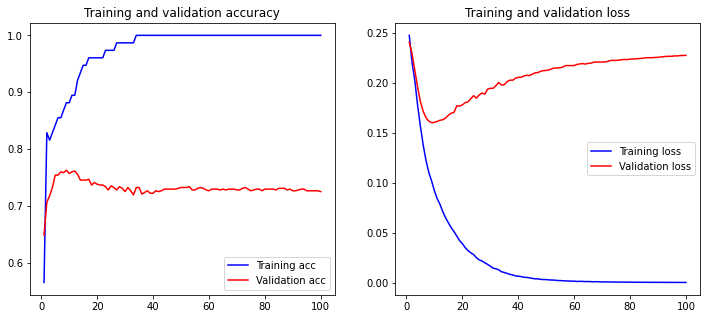

In [105]:
from sklearn.preprocessing import MinMaxScaler
from keras.utils.vis_utils import plot_model

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

mse_A = []
x_train, x_test, y_train, y_test = train_test_split(predictors_norm, target, test_size = 0.9, random_state=40)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=100,batch_size=10, validation_data=(x_test, y_test),verbose=0)
y_predict = model.predict(x_test)
scores = model.evaluate(x_test, y_test, verbose=0) 
    
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

print(model.summary())

In [84]:
from sklearn.neighbors import KNeighborsClassifier
Feature = df[["Pregnancies", "Glucose" ,"BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]]
x=Feature
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288


In [15]:
y = df['Outcome'].values
y[0:5]

array([1, 0, 1, 0, 1])

In [16]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 6.39947260e-01,  8.65108070e-01, -3.35182392e-02,
         6.65502121e-01, -3.34507888e-16,  1.66291742e-01,
         4.68491977e-01],
       [-8.44885053e-01, -1.20616153e+00, -5.29859033e-01,
        -1.74633816e-02, -3.34507888e-16, -8.52531177e-01,
        -3.65060778e-01],
       [ 1.23388019e+00,  2.01581340e+00, -6.95305964e-01,
         8.08793628e-16, -3.34507888e-16, -1.33283341e+00,
         6.04397318e-01],
       [-8.44885053e-01, -1.07465235e+00, -5.29859033e-01,
        -7.00428884e-01, -7.24388738e-01, -6.34211980e-01,
        -9.20762614e-01],
       [-1.14185152e+00,  5.03457822e-01, -2.68066914e+00,
         6.65502121e-01,  1.46550563e-01,  1.54897999e+00,
         5.48490910e+00]])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 7) (614,)
Test set: (154, 7) (154,)


In [18]:
k = 8
kneigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
kneigh

KNeighborsClassifier(n_neighbors=8)

In [19]:
yhat = kneigh.predict(x_test)
yhat[0:5]

array([0, 0, 0, 1, 0])

In [20]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kneigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7980456026058632
Test set Accuracy:  0.7597402597402597


In [21]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    kneigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=kneigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 4


In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7473354231974921

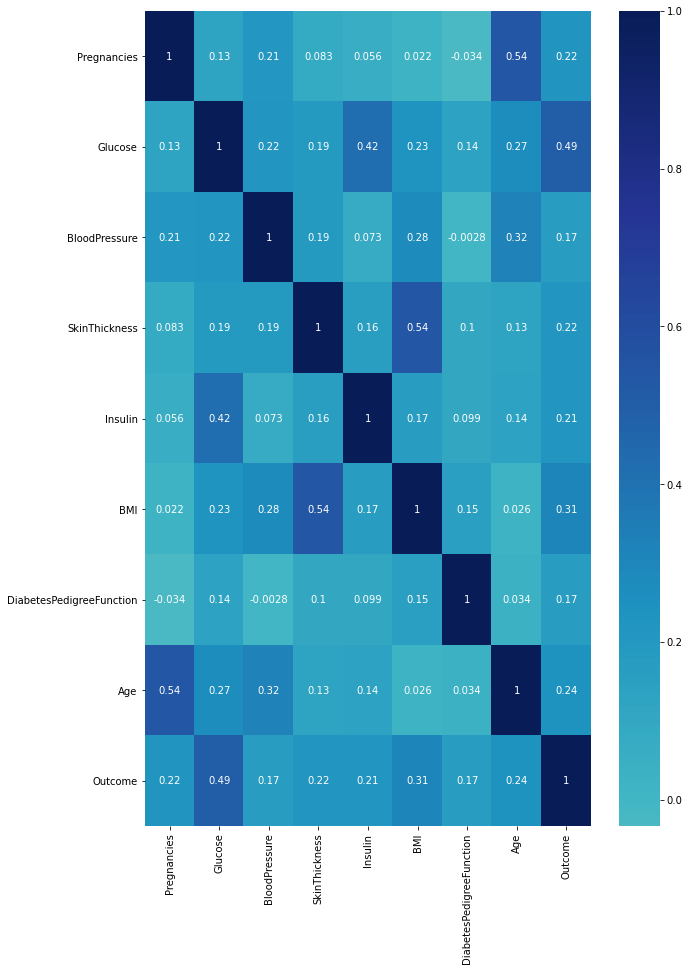

In [23]:
from pylab import rcParams
def plot_correlation(data):
    rcParams['figure.figsize'] = 10, 15
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, center=0, cmap="YlGnBu")
    plt.show()
    fig.savefig('corr.png')
    
plot_correlation(df_data_1)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.2, random_state=3)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 7) (614,)
Test set: (154, 7) (154,)


In [25]:
DiabetesTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DiabetesTree.fit(x_trainset,y_trainset)
DiabetesTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
predloanTree = DiabetesTree.predict(x_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predloanTree))

DecisionTrees's Accuracy:  0.6883116883116883


In [35]:
!pip install pydotplus 
!pip install graphviz

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [36]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

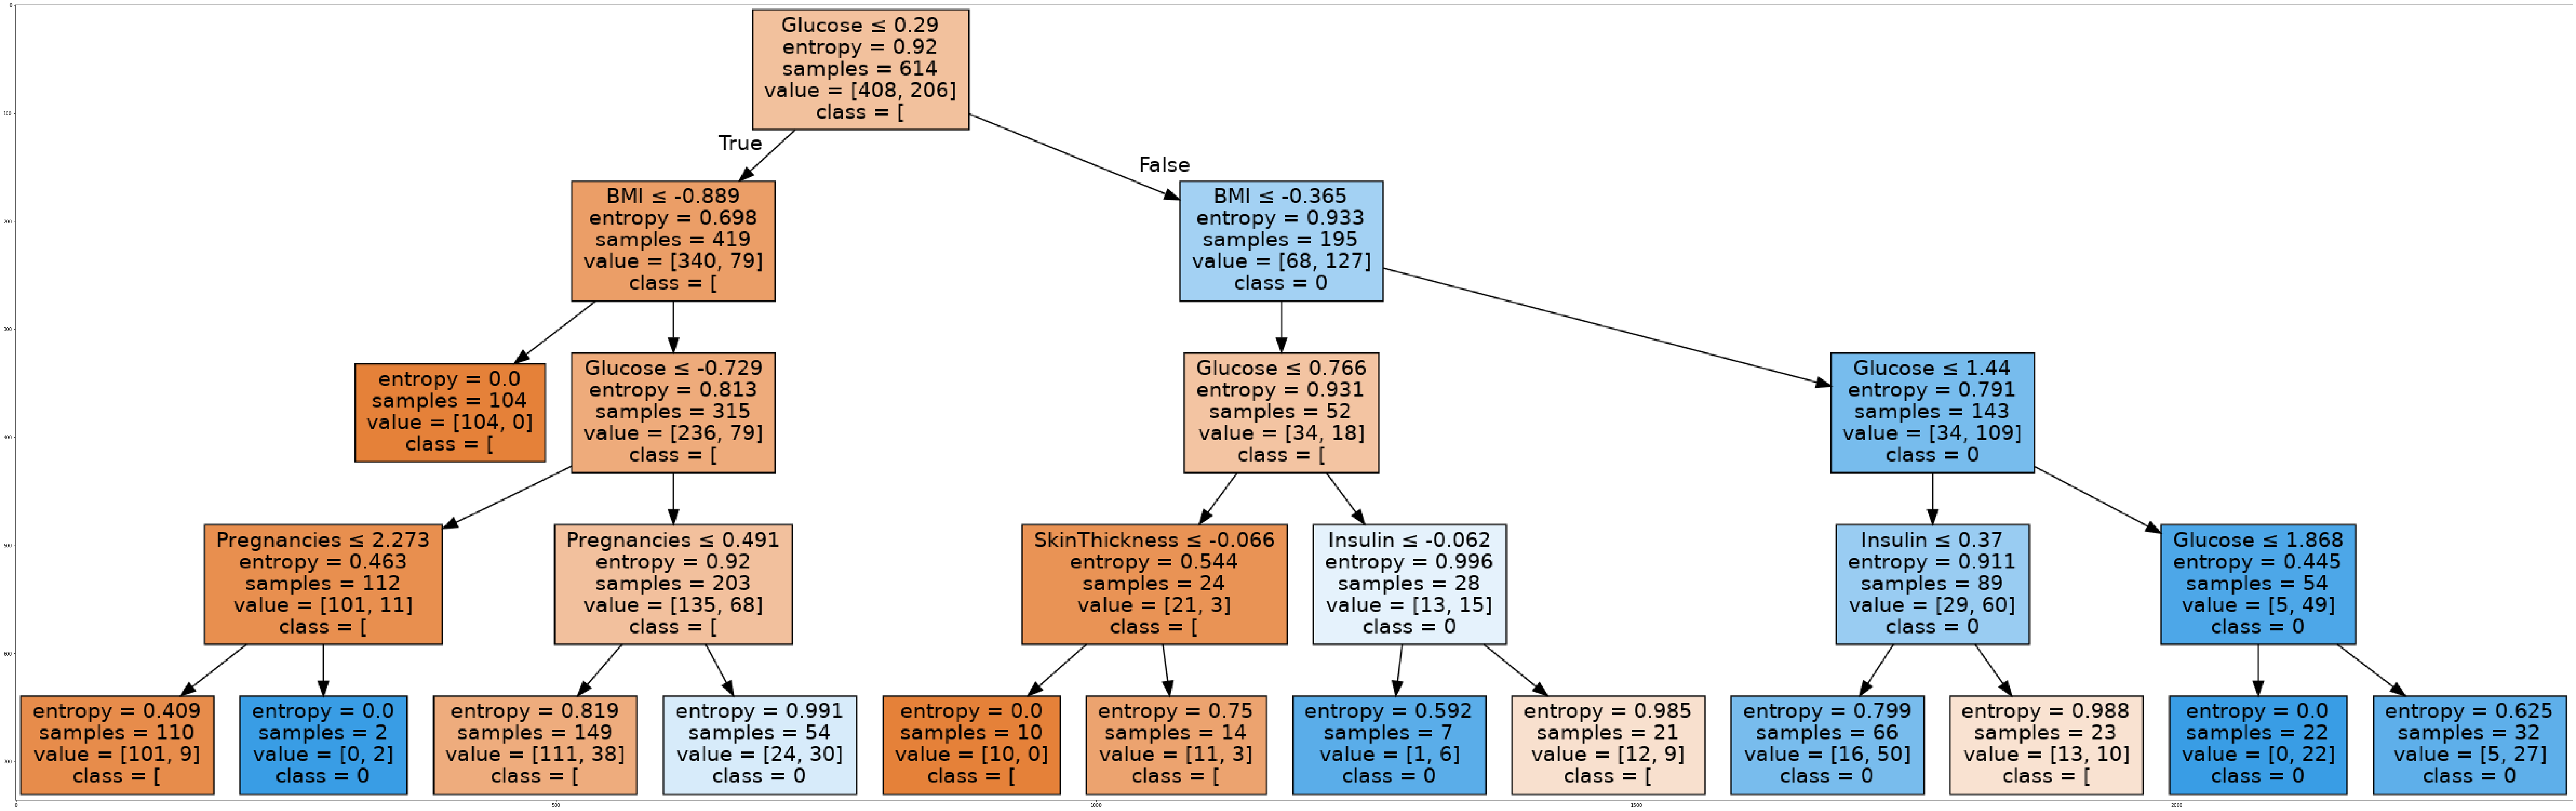

In [37]:
dot_data = StringIO()
filename = "DiabetesTree.png"
featureNames = df.columns[0:7]
targetNames = df["Outcome"].unique().tolist()
out=tree.export_graphviz(DiabetesTree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_trainset)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7473354231974921

In [39]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 7) (614,)
Test set: (154, 7) (154,)


In [40]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [42]:
yhat = clf.predict(x_test)
yhat [0:5]

array([0, 0, 0, 1, 0])

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       102
           1       0.67      0.63      0.65        52

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion matrix, without normalization
[[86 16]
 [19 33]]


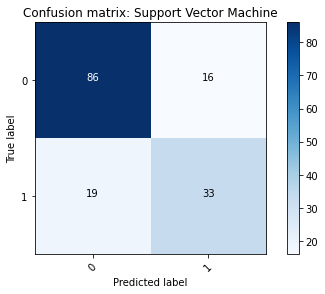

In [45]:
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix: Support Vector Machine')

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7709988390143362

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [48]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [49]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.72, 0.28],
       [0.74, 0.26],
       [0.77, 0.23],
       [0.46, 0.54],
       [0.6 , 0.4 ],
       [0.28, 0.72],
       [0.45, 0.55],
       [0.59, 0.41],
       [0.18, 0.82],
       [0.64, 0.36],
       [0.5 , 0.5 ],
       [0.8 , 0.2 ],
       [0.63, 0.37],
       [0.78, 0.22],
       [0.72, 0.28],
       [0.4 , 0.6 ],
       [0.28, 0.72],
       [0.15, 0.85],
       [0.77, 0.23],
       [0.77, 0.23],
       [0.76, 0.24],
       [0.4 , 0.6 ],
       [0.64, 0.36],
       [0.23, 0.77],
       [0.7 , 0.3 ],
       [0.48, 0.52],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.58, 0.42],
       [0.65, 0.35],
       [0.26, 0.74],
       [0.84, 0.16],
       [0.6 , 0.4 ],
       [0.81, 0.19],
       [0.26, 0.74],
       [0.56, 0.44],
       [0.57, 0.43],
       [0.4 , 0.6 ],
       [0.79, 0.21],
       [0.44, 0.56],
       [0.4 , 0.6 ],
       [0.58, 0.42],
       [0.64, 0.36],
       [0.27, 0.73],
       [0.75, 0.25],
       [0.75, 0.25],
       [0.6 , 0.4 ],
       [0.29,

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat))

[[87 15]
 [19 33]]


In [ ]:
print (classification_report(y_test, yhat))

Confusion matrix, without normalization
[[86 16]
 [19 33]]


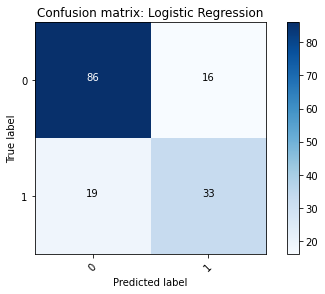

In [51]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix: Logistic Regression')

In [52]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7769280719280719